In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('police.csv')

# Examine the head of the DataFrame
ri.head()



C:\Users\Juelputa\AppData\Local\Temp\ipykernel_8344\3839292736.py:2: DtypeWarning: Columns (6,17,30) have mixed types. Specify dtype option on import or set low_memory=False.
  ri = pd.read_csv('police.csv')


,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,...,reason_for_stop,vehicle_make,vehicle_model,raw_BasisForStop,raw_OperatorRace,raw_OperatorSex,raw_ResultOfStop,raw_SearchResultOne,raw_SearchResultTwo,raw_SearchResultThree
0,1,2005-11-22,11:15:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
1,2,2005-10-01,12:20:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
2,3,2005-10-01,12:30:00,X3,white,female,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN
3,4,2005-10-01,12:50:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
4,5,2005-10-01,13:10:00,X3,white,female,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN


In [6]:
# Count the number of missing values in each column and explore the dataset
ri.isnull().sum()

raw_row_number                0
date                         10
time                         10
zone                         10
subject_race              29073
subject_sex               29097
department_id                10
type                          0
arrest_made               29073
citation_issued           29073
warning_issued            29073
outcome                   35841
contraband_found         491919
contraband_drugs         493693
contraband_weapons       497886
contraband_alcohol       508464
contraband_other         491919
frisk_performed              10
search_conducted              0
search_basis             491919
reason_for_search        491919
reason_for_stop           29073
vehicle_make             191564
vehicle_model            279593
raw_BasisForStop          29073
raw_OperatorRace          29073
raw_OperatorSex           29073
raw_ResultOfStop          29073
raw_SearchResultOne      491919
raw_SearchResultTwo      508862
raw_SearchResultThree    509513
dtype: i

In [7]:
# Examine the shape of the DataFrame
ri.shape

(509681, 31)

In [ ]:

# Drop the 'county_name' and 'state' columns
#ri.drop(['county_name', 'state'], axis='columns', inplace=True)



In [8]:
ri.raw_OperatorSex.value_counts()
#this column specifies the sex of each driver

M    349446
F    131138
U        23
N         1
Name: raw_OperatorSex, dtype: int64

In [9]:

# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['raw_OperatorSex'], inplace=True)


In [10]:
ri.isnull().sum()

raw_row_number                0
date                          0
time                          0
zone                          0
subject_race                  0
subject_sex                  24
department_id                 0
type                          0
arrest_made                   0
citation_issued               0
warning_issued                0
outcome                    6768
contraband_found         462846
contraband_drugs         464620
contraband_weapons       468813
contraband_alcohol       479391
contraband_other         462846
frisk_performed               0
search_conducted              0
search_basis             462846
reason_for_search        462846
reason_for_stop               0
vehicle_make             162525
vehicle_model            250554
raw_BasisForStop              0
raw_OperatorRace              0
raw_OperatorSex               0
raw_ResultOfStop              0
raw_SearchResultOne      462846
raw_SearchResultTwo      479789
raw_SearchResultThree    480440
dtype: i

In [13]:
# Examinining the head of the 'is_arrested' column
ri.arrest_made.value_counts()


False    464005
True      16603
Name: arrest_made, dtype: int64

In [15]:
#concatenating the time and date column to create a datetime index.

0    11:15:00
1    12:20:00
2    12:30:00
3    12:50:00
4    13:10:00
Name: time, dtype: object

In [16]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.date.str.cat(ri.time, sep = ' ')

# Convert 'combined' to datetime format
ri['datetime'] = pd.to_datetime(combined)



In [17]:
ri.head()

,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,...,vehicle_make,vehicle_model,raw_BasisForStop,raw_OperatorRace,raw_OperatorSex,raw_ResultOfStop,raw_SearchResultOne,raw_SearchResultTwo,raw_SearchResultThree,datetime
0,1,2005-11-22,11:15:00,X3,white,male,200,vehicular,False,True,...,NaN,NaN,SP,W,M,M,NaN,NaN,NaN,2005-11-22 11:15:00
1,2,2005-10-01,12:20:00,X3,white,male,200,vehicular,False,True,...,NaN,NaN,SP,W,M,M,NaN,NaN,NaN,2005-10-01 12:20:00
2,3,2005-10-01,12:30:00,X3,white,female,200,vehicular,False,True,...,NaN,NaN,SP,W,F,M,NaN,NaN,NaN,2005-10-01 12:30:00
3,4,2005-10-01,12:50:00,X3,white,male,200,vehicular,False,True,...,NaN,NaN,SP,W,M,M,NaN,NaN,NaN,2005-10-01 12:50:00
4,5,2005-10-01,13:10:00,X3,white,female,200,vehicular,False,True,...,NaN,NaN,SP,W,F,M,NaN,NaN,NaN,2005-10-01 13:10:00


In [18]:
# Set 'stop_datetime' as the index
ri.set_index('datetime', inplace=True)


In [19]:
ri.head()

,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,...,reason_for_stop,vehicle_make,vehicle_model,raw_BasisForStop,raw_OperatorRace,raw_OperatorSex,raw_ResultOfStop,raw_SearchResultOne,raw_SearchResultTwo,raw_SearchResultThree
datetime,,,,,,,,,,,,,,,,,,,,,
2005-11-22 11:15:00,1,2005-11-22,11:15:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
2005-10-01 12:20:00,2,2005-10-01,12:20:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
2005-10-01 12:30:00,3,2005-10-01,12:30:00,X3,white,female,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN
2005-10-01 12:50:00,4,2005-10-01,12:50:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
2005-10-01 13:10:00,5,2005-10-01,13:10:00,X3,white,female,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN


In [ ]:
#exploring relationships between gender and police stopping the drivers.

In [21]:
ri.reason_for_stop.value_counts(normalize = True)

Speeding                            0.559175
Other Traffic Violation             0.187750
Equipment/Inspection Violation      0.127447
Registration Violation              0.041260
Seatbelt Violation                  0.033972
Special Detail/Directed Patrol      0.028385
Call for Service                    0.015832
Violation of City/Town Ordinance    0.002156
Motorist Assist/Courtesy            0.002060
APB                                 0.001009
Suspicious Person                   0.000712
Warrant                             0.000243
Name: reason_for_stop, dtype: float64

In [22]:
# Creating a DataFrame of female and male drivers
female = ri[ri.raw_OperatorSex == 'F']

male = ri[ri.raw_OperatorSex == 'M']



In [23]:
# Compute the violations by female drivers (as proportions)
female.reason_for_stop.value_counts(normalize = True)



Speeding                            0.657308
Other Traffic Violation             0.136581
Equipment/Inspection Violation      0.107055
Registration Violation              0.043077
Seatbelt Violation                  0.027071
Call for Service                    0.018057
Special Detail/Directed Patrol      0.005071
Motorist Assist/Courtesy            0.002532
Violation of City/Town Ordinance    0.001647
APB                                 0.000831
Suspicious Person                   0.000564
Warrant                             0.000206
Name: reason_for_stop, dtype: float64

In [24]:
# Compute the violations by male drivers (as proportions)
male.reason_for_stop.value_counts(normalize = True)

Speeding                            0.522364
Other Traffic Violation             0.206948
Equipment/Inspection Violation      0.135102
Registration Violation              0.040581
Special Detail/Directed Patrol      0.037136
Seatbelt Violation                  0.036555
Call for Service                    0.014987
Violation of City/Town Ordinance    0.002347
Motorist Assist/Courtesy            0.001880
APB                                 0.001076
Suspicious Person                   0.000767
Warrant                             0.000258
Name: reason_for_stop, dtype: float64

In [26]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.raw_OperatorSex == 'F') & (ri.reason_for_stop == 'Speeding')]

In [27]:
# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.raw_OperatorSex == 'M') & (ri.reason_for_stop == 'Speeding')]

In [32]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 480608 entries, 2005-11-22 11:15:00 to 2015-10-30 11:09:00
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   raw_row_number         480608 non-null  int64 
 1   date                   480608 non-null  object
 2   time                   480608 non-null  object
 3   zone                   480608 non-null  object
 4   subject_race           480608 non-null  object
 5   subject_sex            480584 non-null  object
 6   department_id          480608 non-null  object
 7   type                   480608 non-null  object
 8   arrest_made            480608 non-null  object
 9   citation_issued        480608 non-null  object
 10  warning_issued         480608 non-null  object
 11  outcome                473840 non-null  object
 12  contraband_found       17762 non-null   object
 13  contraband_drugs       15988 non-null   object
 14  contraband_weapons

In [34]:
# Compute the stop outcomes for female drivers (as proportions)
female_and_speeding.raw_ResultOfStop.value_counts(normalize=True)

M    0.953247
W    0.039003
D    0.005290
P    0.001033
N    0.000905
A    0.000522
Name: raw_ResultOfStop, dtype: float64

In [ ]:
'''
where m stands for 
m = Citation            9.522e-01
w = Warning             4.007e-02
d = Arrest Driver       5.752e-03
p = N/D                 9.587e-04
n = Arrest Passenger    6.391e-04
a = No Action           3.835e-04
'''

In [35]:
# Compute the stop outcomes for male drivers (as proportions)
male_and_speeding.raw_ResultOfStop.value_counts(normalize=True)

M    0.944636
W    0.036086
D    0.015767
P    0.001265
N    0.001183
A    0.001063
Name: raw_ResultOfStop, dtype: float64

In [36]:

ri.search_conducted.dtype

dtype('bool')

In [37]:
ri.search_conducted.value_counts(normalize = True)

False    0.963043
True     0.036957
Name: search_conducted, dtype: float64

In [38]:

ri.search_conducted.mean()

0.03695735401824356

In [39]:
ri[ri.raw_OperatorSex == 'F'].search_conducted.mean()

0.018751239152648355

In [40]:
ri[ri.raw_OperatorSex == 'M'].search_conducted.mean()

0.04379217389811301

In [45]:
values = ['N', 'U']
ri = ri[ri.raw_OperatorSex.isin(values) == False]

#df = df[df.column_name.isin(values) == False]

In [46]:
ri.groupby('raw_OperatorSex').search_conducted.mean()

raw_OperatorSex
F    0.018751
M    0.043792
Name: search_conducted, dtype: float64

In [47]:
ri.groupby(['raw_OperatorSex', 'reason_for_stop']).search_conducted.mean()

raw_OperatorSex  reason_for_stop                 
F                APB                                 0.165138
                 Call for Service                    0.042230
                 Equipment/Inspection Violation      0.040245
                 Motorist Assist/Courtesy            0.033133
                 Other Traffic Violation             0.038021
                 Registration Violation              0.054700
                 Seatbelt Violation                  0.017746
                 Special Detail/Directed Patrol      0.018045
                 Speeding                            0.007738
                 Suspicious Person                   0.216216
                 Violation of City/Town Ordinance    0.060185
                 Warrant                             0.148148
M                APB                                 0.255319
                 Call for Service                    0.092419
                 Equipment/Inspection Violation      0.070916
                 Mot

In [49]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 480584 entries, 2005-11-22 11:15:00 to 2015-10-30 11:09:00
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   raw_row_number         480584 non-null  int64 
 1   date                   480584 non-null  object
 2   time                   480584 non-null  object
 3   zone                   480584 non-null  object
 4   subject_race           480584 non-null  object
 5   subject_sex            480584 non-null  object
 6   department_id          480584 non-null  object
 7   type                   480584 non-null  object
 8   arrest_made            480584 non-null  object
 9   citation_issued        480584 non-null  object
 10  warning_issued         480584 non-null  object
 11  outcome                473821 non-null  object
 12  contraband_found       17762 non-null   object
 13  contraband_drugs       15988 non-null   object
 14  contraband_weapons

In [56]:
ri.reason_for_search.value_counts().head(10)

Incident to Arrest                      6998
Probable Cause                          2063
Odor of Drugs/Alcohol                   1872
Reasonable Suspicion                    1141
Inventory/Tow                           1101
Terry Frisk                              879
Incident to Arrest|Inventory/Tow         582
Plain View                               425
Odor of Drugs/Alcohol|Probable Cause     153
Probable Cause|Odor of Drugs/Alcohol     145
Name: reason_for_search, dtype: int64

In [57]:
ri['frisk'] = ri.reason_for_search.str.contains('Terry Frisk', na= False)

C:\Users\Juelputa\AppData\Local\Temp\ipykernel_8344\1604594287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ri['frisk'] = ri.reason_for_search.str.contains('Terry Frisk', na= False)


In [58]:

# Take the sum of 'frisk'
print(ri.frisk.sum())

1598


In [59]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
searched.frisk.mean()



0.08996734601959239

In [60]:
# Calculate the frisk rate for each gender
searched.groupby('raw_OperatorSex').frisk.mean()

raw_OperatorSex
F    0.066694
M    0.093707
Name: frisk, dtype: float64

Time it occured

In [64]:
# Calculate the overall arrest rate
ri.arrest_made.mean()

0.03454755048024903

In [65]:

# Calculate the hourly arrest rate
ri.groupby(ri.index.hour).arrest_made.mean()

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).arrest_made.mean()

In [66]:
hourly_arrest_rate

datetime
0     0.052151
1     0.067127
2     0.061067
3     0.052613
4     0.053897
5     0.032657
6     0.012949
7     0.013829
8     0.019717
9     0.024699
10    0.025583
11    0.027078
12    0.031361
13    0.030250
14    0.031531
15    0.032125
16    0.033519
17    0.038989
18    0.039902
19    0.031366
20    0.039292
21    0.059956
22    0.043980
23    0.045087
Name: arrest_made, dtype: float64

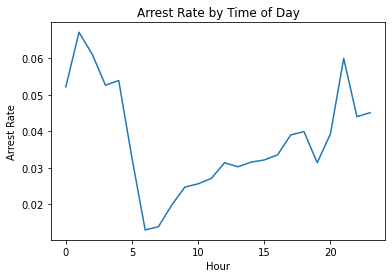

In [67]:
hourly_arrest_rate.plot()
# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

In [69]:
ri.contraband_drugs.value_counts()

False    11223
True      4765
Name: contraband_drugs, dtype: int64

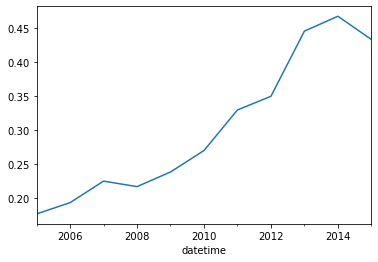

In [70]:
# Calculate the annual rate of drug-related stops
ri.contraband_drugs.resample('A').mean()
# Save the annual rate of drug-related stops
annual_drug_rate = ri.contraband_drugs.resample('A').mean()
# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()
#display the plot
plt.show()

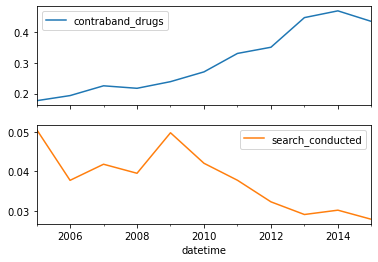

In [71]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

In [72]:
# Create a frequency table of districts and violations
pd.crosstab(ri.zone, ri.reason_for_stop)

reason_for_stop,APB,Call for Service,Equipment/Inspection Violation,Motorist Assist/Courtesy,Other Traffic Violation,Registration Violation,Seatbelt Violation,Special Detail/Directed Patrol,Speeding,Suspicious Person,Violation of City/Town Ordinance,Warrant
zone,,,,,,,,,,,,
K1,32,281,3786,78,7127,628,1,1009,33067,72,21,8
K2,101,1036,11285,118,16440,4056,2897,3539,57500,59,237,13
K3,144,1227,12959,258,16218,3871,3660,2011,68234,68,194,24
X1,6,198,1725,33,3711,192,451,503,6393,5,6,1
X3,64,1328,11520,323,17178,3532,4445,1996,48687,41,282,35
X4,138,3535,19975,179,29554,7551,4870,4584,54855,97,296,36


In [75]:



# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.zone, ri.reason_for_stop)

# Select rows 'Zone K1' through 'Zone K3'
k_zones = all_zones.loc['K1': 'K3'] 

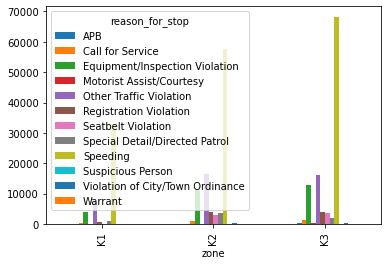

In [80]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind = 'bar')
# Display the plot
plt.show()

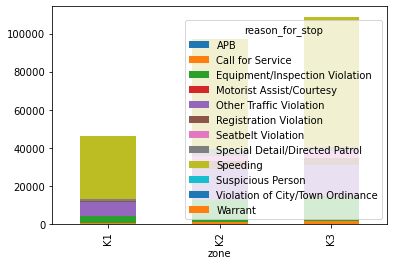

In [77]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind = 'bar', stacked = True)

# Display the plot
plt.show()